In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

In [3]:
with open("./dataset/resnet18_clipped/x.data", "rb") as f:
     x = np.load(f)
        
with open("./dataset/resnet18_clipped/y.data", "rb") as f:
     y = np.load(f)

In [4]:
from sklearn.preprocessing import minmax_scale
y = minmax_scale(y)

In [5]:
y

array([0.5044815 , 0.4761111 , 0.47685185, ..., 0.50711113, 0.4058889 ,
       0.5504074 ], dtype=float32)

## from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)

model = SVR(gamma='scale')
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error, max_error, r2_score, mean_squared_log_error

In [113]:
def score(y_pred, y_true):
    for err in [mean_squared_error, max_error, r2_score, mean_squared_log_error]:
        print(f"{err.__name__}: {err(y_pred, y_true)}")
        
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashed', linewidth=1)
    plt.plot([0, 1], [0.1, 1.1], color='orange', linestyle='dashed', linewidth=1)
    plt.plot([0, 1], [-0.1, 0.9], color='orange', linestyle='dashed', linewidth=1)
    plt.plot([0, 1], [0.2, 1.2], color='red', linestyle='dashed', linewidth=1)
    plt.plot([0, 1], [-0.2, 0.8], color='red', linestyle='dashed', linewidth=1)

    plt.text(0.01, 0.35, "+- 0.2", color='red', fontsize=14, weight=1000)
    plt.text(0.8, 0.75, "+- 0.1", color='orange', fontsize=14, weight=1000)


    plt.scatter(y_pred, y_true, s=2)

    plt.title(f"Prediction for the steering angle using a {type(model).__name__}")
    plt.xlabel("prediction")
    plt.ylabel("ground truth")

    plt.xlim((0, 1))
    plt.ylim((0, 1))

mean_squared_error: 0.003349903627901972
max_error: 0.36766440293955815
r2_score: 0.4333023433868639
mean_squared_log_error: 0.0015533441958419248


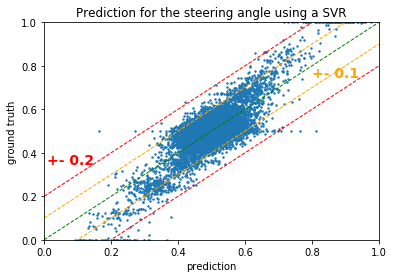

In [114]:
score(y_pred, y_test)

mean_squared_error: 0.009816828183829784
max_error: 0.504220187664032
r2_score: -2763191439758.08
mean_squared_log_error: 0.004512347746640444


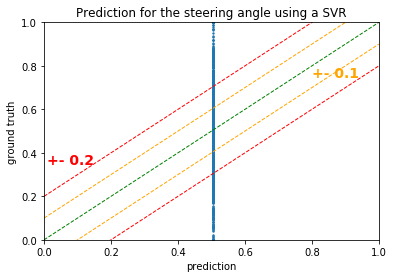

In [115]:
test_mean = np.mean(y_test)
y_mean = [test_mean]*len(y_test)

score(y_mean, y_test)

In [125]:
test_arr = np.array([i for i in range(100)])
test_arr2 = np.array([x + 2 for x in test_arr])
r2_score(test_arr, test_arr2)

0.9951995199519952

In [129]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [130]:
dir(model)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_pairwise',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'cache_size',
 'class_weight',
 'class_weight_',
 'coef0',
 'coef_',
 'degree',
 'dual_coef_',
 'epsilon',
 'fit',
 'fit_status_',
 'gamm

In [226]:
import save
import importlib
importlib.reload(save)

<module 'save' from '/home/sfluor/projects/driving_dataset/save.py'>

In [227]:
config = save.extract_svr_config(model)
m2 = save.svr_from_config(config)

In [228]:
print(m2.predict(x[:10]))
print(model.predict(x[:10]))

[0.50808439 0.46178788 0.51228252 0.5083125  0.5041429  0.47265264
 0.57935942 0.49062126 0.46981878 0.43362939]
[0.50808439 0.46178788 0.51228252 0.5083125  0.5041429  0.47265264
 0.57935942 0.49062126 0.46981878 0.43362939]


In [229]:
m3 = svr_from_config(config)
m3.predict(x[:10])

array([0.50808439, 0.46178788, 0.51228252, 0.5083125 , 0.5041429 ,
       0.47265264, 0.57935942, 0.49062126, 0.46981878, 0.43362939])

In [230]:
with open("/tmp/params.json", "w") as f:
    import json
    json.dump(config, f)

TypeError: Object of type dtype is not JSON serializable